# ETH Forecast Demo

This notebook demonstrates the MVP backend flow for this project:
- Ingest ETH price data
- Compute technical indicators
- Perform sentiment analysis on sample news
- Combine signals to generate a scenario-based insight

## Data Ingestion

In [14]:
# Simulate price data from API

import pandas as pd
import numpy as np

dates = pd.date_range(end=pd.Timestamp.now(), periods=30)
prices = 1800 + np.random.normal(0, 50, size=30).cumsum()

df = pd.DataFrame({'date': dates, 'price': prices})

print(df.head()) # display first few rows
df.to_csv('simulated_prices.csv', index=False)  # save to CSV

                        date        price
0 2025-05-16 20:24:30.317970  1793.174189
1 2025-05-17 20:24:30.317970  1710.822294
2 2025-05-18 20:24:30.317970  1663.092272
3 2025-05-19 20:24:30.317970  1670.678726
4 2025-05-20 20:24:30.317970  1687.408817


# Technical Indicator (RSI)

In [15]:
from ta.momentum import RSIIndicator

rsi = RSIIndicator(close=df['price'], window=14)
df['RSI'] = rsi.rsi()
df.tail()

,date,price,RSI
25,2025-06-10 20:24:30.317970,1592.500903,36.429080
26,2025-06-11 20:24:30.317970,1534.066213,31.802390
27,2025-06-12 20:24:30.317970,1560.405089,35.762627
28,2025-06-13 20:24:30.317970,1581.011544,38.758929
29,2025-06-14 20:24:30.317970,1540.851089,35.302822


# Sentiment Analysis of Sample News

In [16]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
sample_news = "Ethereum shows strong recovery as investor sentiment improves."
sentiment_score = analyzer.polarity_scores(sample_news)
sentiment_score

{'neg': 0.0, 'neu': 0.496, 'pos': 0.504, 'compound': 0.7269}

## Signal Fusion Logic

In [18]:
latest_rsi = df['RSI'].iloc[-1]
compound_score = sentiment_score['compound']

if latest_rsi < 30 and compound_score > 0.2:
    insight = "Buy Signal (RSI oversold + positive sentiment)"
elif latest_rsi > 70 and compound_score < -0.2:
    insight = "Sell Signal (RSI overbought + negative sentiment)"
else:
    insight = "Hold / Neutral"

insight

'Hold / Neutral'

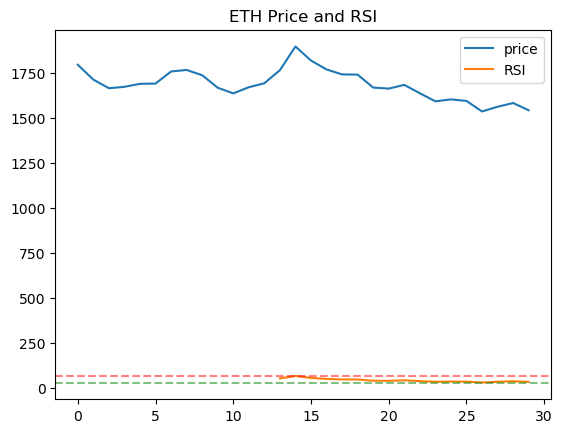

In [19]:
import matplotlib.pyplot as plt

df[['price', 'RSI']].plot(title="ETH Price and RSI")
plt.axhline(70, color='red', linestyle='--', alpha=0.5)
plt.axhline(30, color='green', linestyle='--', alpha=0.5)
plt.show()